In [7]:
# E-Commerce Customer Analysis: From Data Engineering to Model Deployment
## Part 1: Data Engineering & Feature Construction


In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import pickle
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep=',')

# Quick preview of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Dataset dimensions
print(f"\nDataset dimensions: {df.shape}")

# Columns and data types
print("\nColumn data types:")
print(df.dtypes)

# Count of numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nNumber of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

# Statistical summaries for numerical columns
print("\nStatistical summaries for numerical columns:")
display(df.describe())

# Unique value counts for categorical columns
print("\nUnique value counts for categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

First 5 rows of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Dataset dimensions: (2240, 29)

Column data types:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Number of numerical columns: 26
Nu

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



Unique value counts for categorical columns:

Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Dt_Customer:
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


Missing values per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


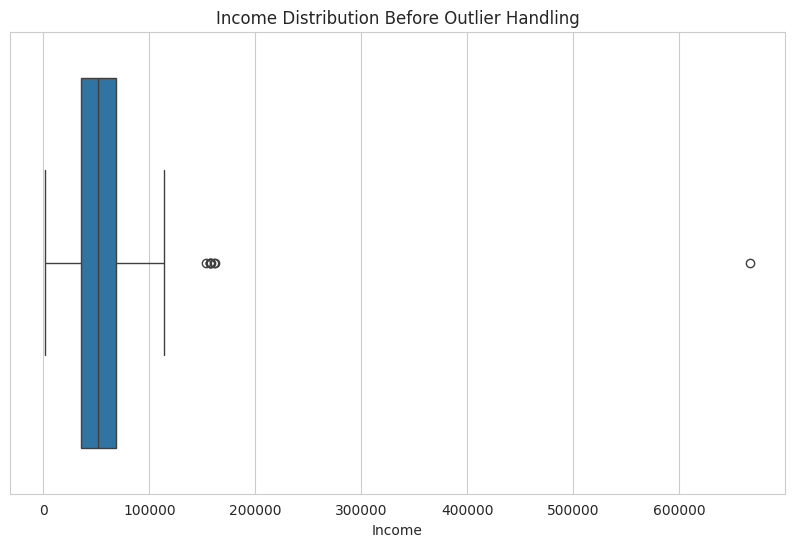


After cleaning:
Missing values remaining: 0
Income max after capping: 94437.68
Date column type: datetime64[ns]


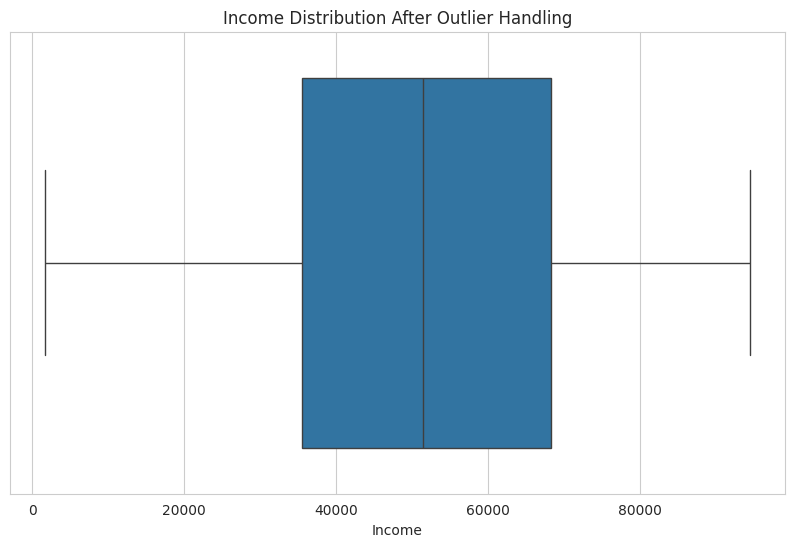

In [3]:
### 1.3 Data Cleaning

# Analyze missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values
# Income is the only column with missing values (24 missing)
# We'll impute with median as income is likely skewed
df['Income'] = df['Income'].fillna(df['Income'].median())

# Identify and handle outliers
# Let's look at Income distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution Before Outlier Handling')
plt.show()

# Cap extreme income values at 99th percentile
income_99th = df['Income'].quantile(0.99)
df['Income'] = np.where(df['Income'] > income_99th, income_99th, df['Income'])

# Convert date column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Validate data cleaning
print("\nAfter cleaning:")
print(f"Missing values remaining: {df.isnull().sum().sum()}")
print(f"Income max after capping: {df['Income'].max():.2f}")
print(f"Date column type: {df['Dt_Customer'].dtype}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution After Outlier Handling')
plt.show()

In [4]:
# Feature ENGINEERING
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpend'] = df[spending_cols].sum(axis=1)

# Create CustomerValueTier
conditions = [
    (df['TotalSpend'] >= 1000),
    (df['TotalSpend'] >= 500) & (df['TotalSpend'] < 1000),
    (df['TotalSpend'] >= 200) & (df['TotalSpend'] < 500),
    (df['TotalSpend'] < 200)
]
tiers = ['Premium', 'Gold', 'Silver', 'Bronze']
df['CustomerValueTier'] = np.select(conditions, tiers)

# Create CustomerAge
current_year = datetime.now().year
df['CustomerAge'] = current_year - df['Year_Birth']

# Create AverageSpending
df['AverageSpending'] = df[spending_cols].mean(axis=1)

# Show new features
print("\nNew features sample:")
display(df[['TotalSpend', 'CustomerValueTier', 'CustomerAge', 'AverageSpending']].head())

# Value tier distribution
print("\nCustomer Value Tier Distribution:")
print(df['CustomerValueTier'].value_counts())


New features sample:


,TotalSpend,CustomerValueTier,CustomerAge,AverageSpending
0,1617,Premium,68,269.500000
1,27,Bronze,71,4.500000
2,776,Gold,60,129.333333
3,53,Bronze,41,8.833333
4,422,Silver,44,70.333333



Customer Value Tier Distribution:
CustomerValueTier
Bronze     903
Premium    602
Gold       393
Silver     342
Name: count, dtype: int64


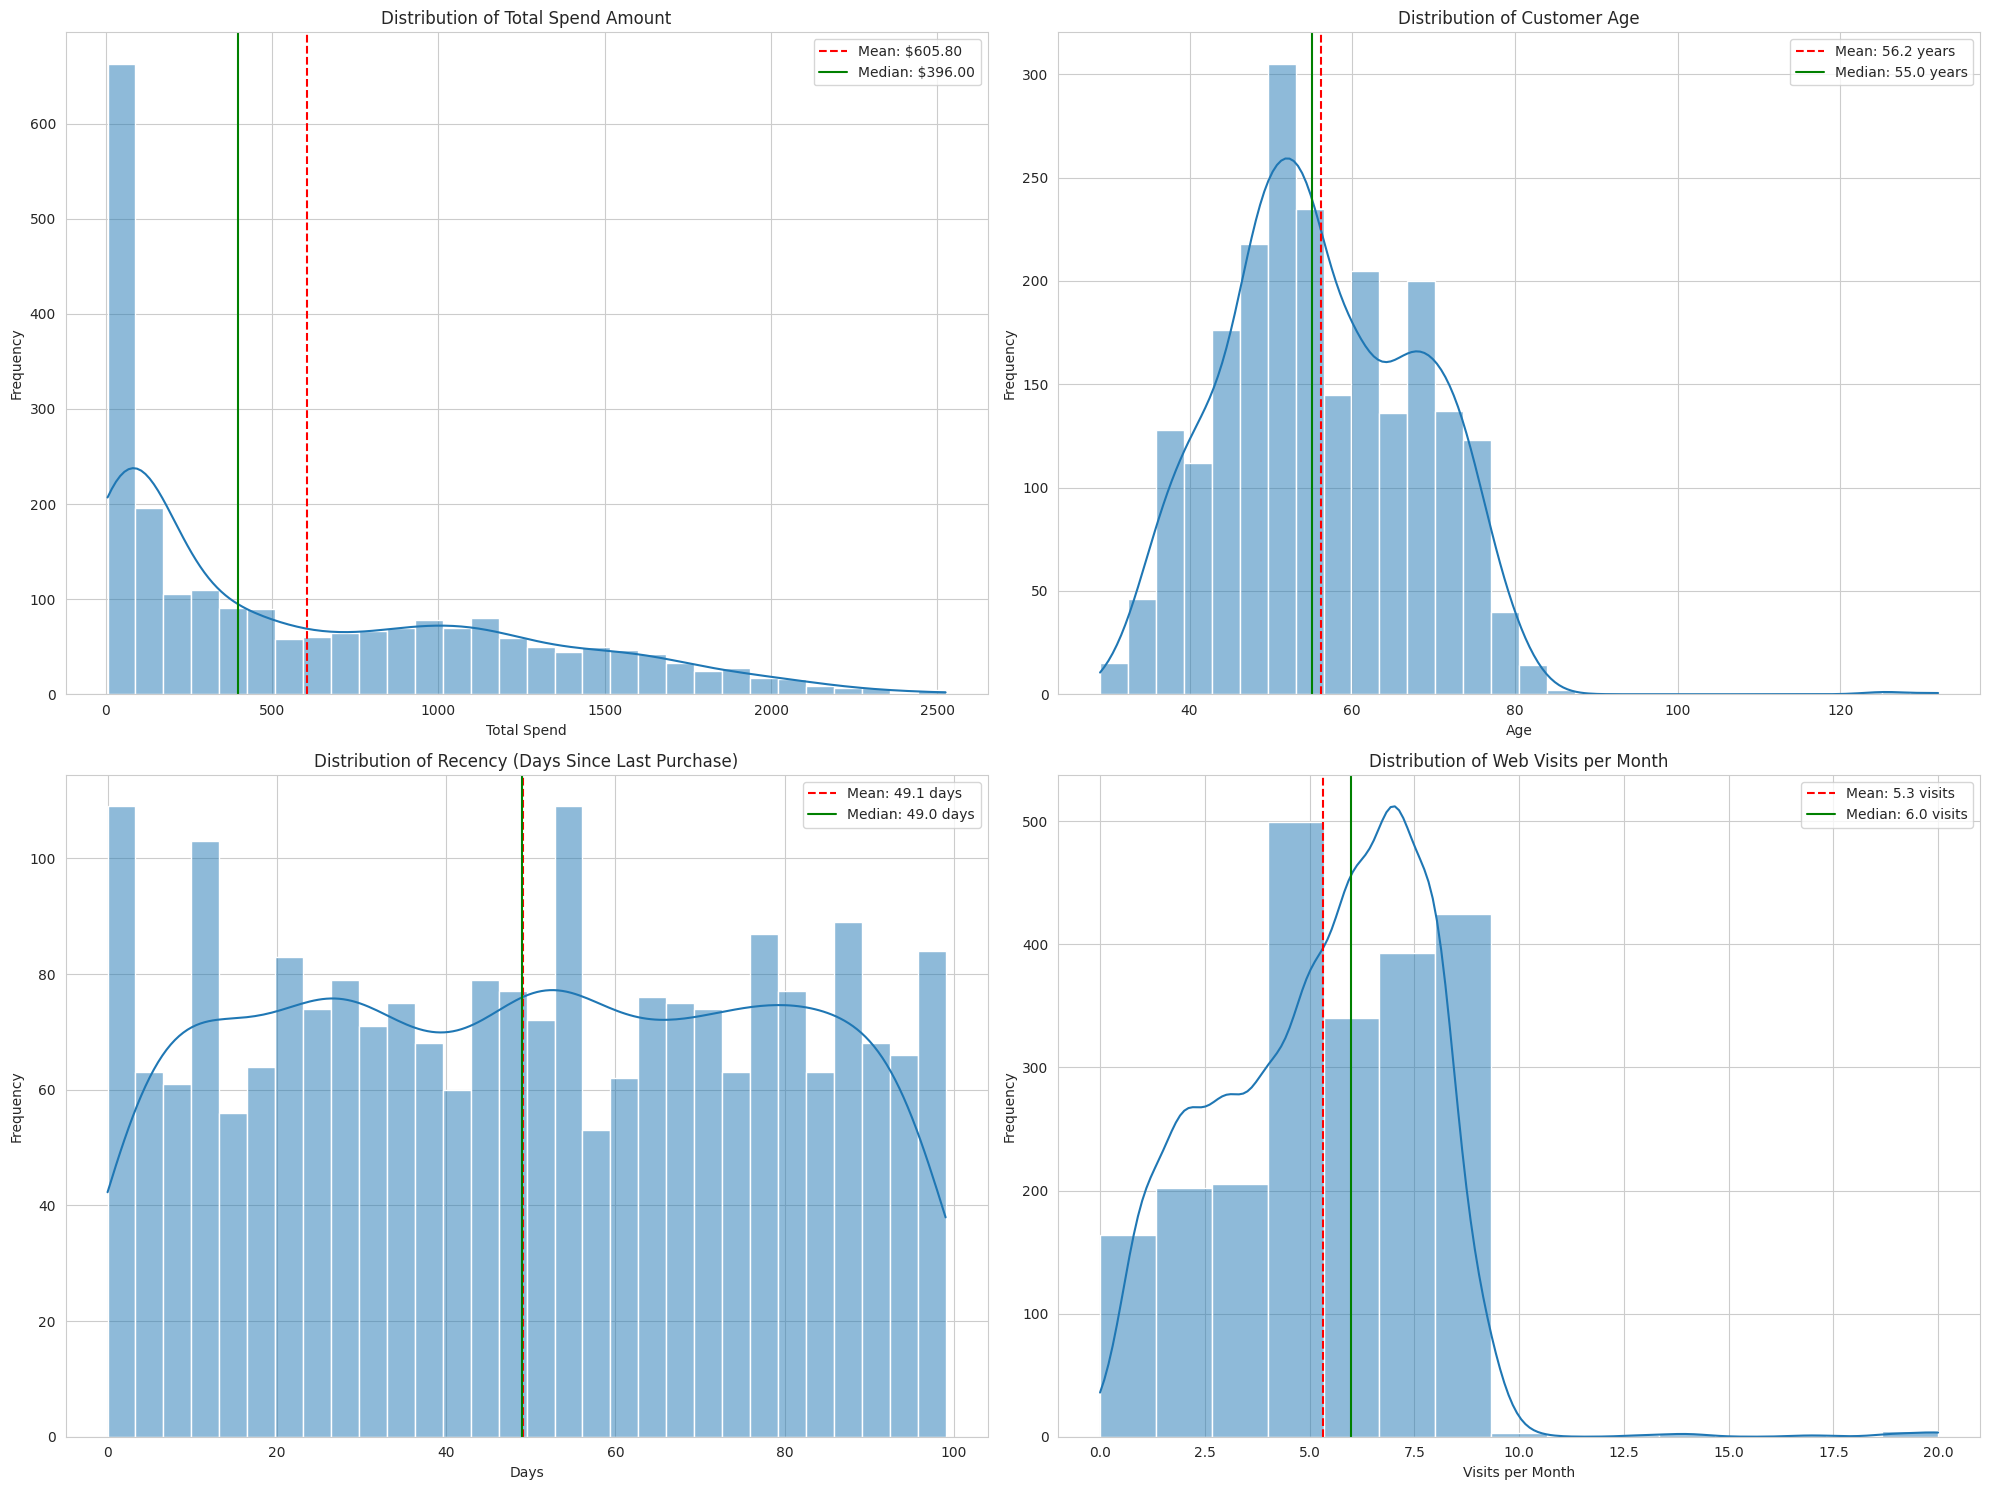

In [6]:
# Set up the figure
plt.figure(figsize=(20, 15))

# Total Spend Amount distribution
plt.subplot(2, 2, 1)
sns.histplot(df['TotalSpend'], kde=True, bins=30)
plt.title('Distribution of Total Spend Amount')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
mean_spend = df['TotalSpend'].mean()
median_spend = df['TotalSpend'].median()
plt.axvline(mean_spend, color='r', linestyle='--', label=f'Mean: ${mean_spend:.2f}')
plt.axvline(median_spend, color='g', linestyle='-', label=f'Median: ${median_spend:.2f}')
plt.legend()

# Customer Age distribution
plt.subplot(2, 2, 2)
sns.histplot(df['CustomerAge'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
mean_age = df['CustomerAge'].mean()
median_age = df['CustomerAge'].median()
plt.axvline(mean_age, color='r', linestyle='--', label=f'Mean: {mean_age:.1f} years')
plt.axvline(median_age, color='g', linestyle='-', label=f'Median: {median_age:.1f} years')
plt.legend()

# Recency distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Recency'], kde=True, bins=30)
plt.title('Distribution of Recency (Days Since Last Purchase)')
plt.xlabel('Days')
plt.ylabel('Frequency')
mean_recency = df['Recency'].mean()
median_recency = df['Recency'].median()
plt.axvline(mean_recency, color='r', linestyle='--', label=f'Mean: {mean_recency:.1f} days')
plt.axvline(median_recency, color='g', linestyle='-', label=f'Median: {median_recency:.1f} days')
plt.legend()

# Number of Web Visits per Month
plt.subplot(2, 2, 4)
sns.histplot(df['NumWebVisitsMonth'], kde=True, bins=15)
plt.title('Distribution of Web Visits per Month')
plt.xlabel('Visits per Month')
plt.ylabel('Frequency')
mean_visits = df['NumWebVisitsMonth'].mean()
median_visits = df['NumWebVisitsMonth'].median()
plt.axvline(mean_visits, color='r', linestyle='--', label=f'Mean: {mean_visits:.1f} visits')
plt.axvline(median_visits, color='g', linestyle='-', label=f'Median: {median_visits:.1f} visits')
plt.legend()

plt.tight_layout()
plt.show()

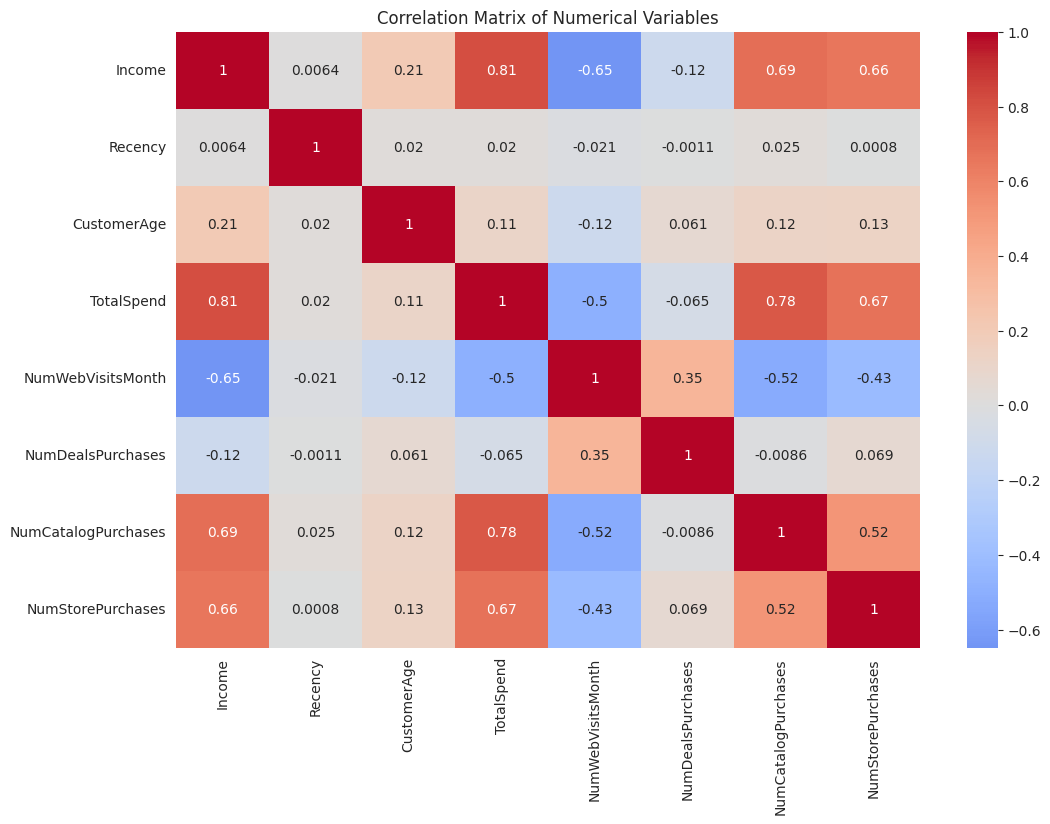

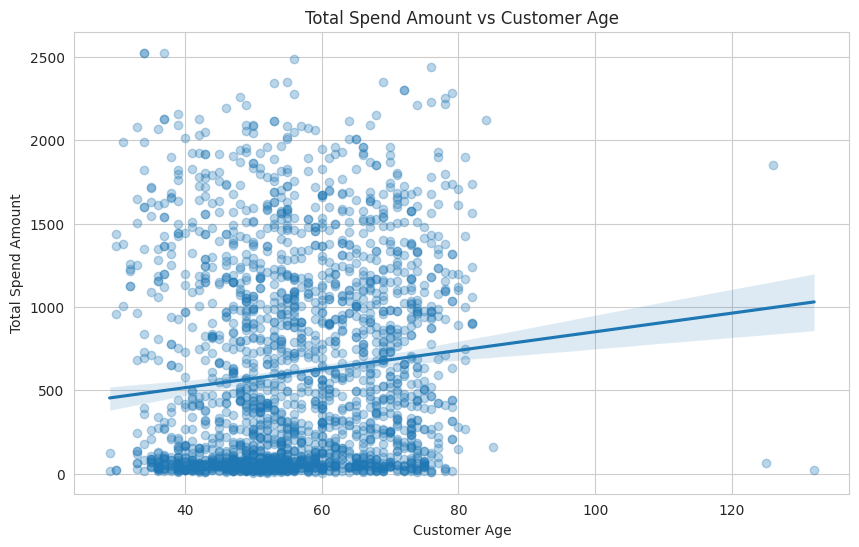

<Figure size 1500x600 with 0 Axes>

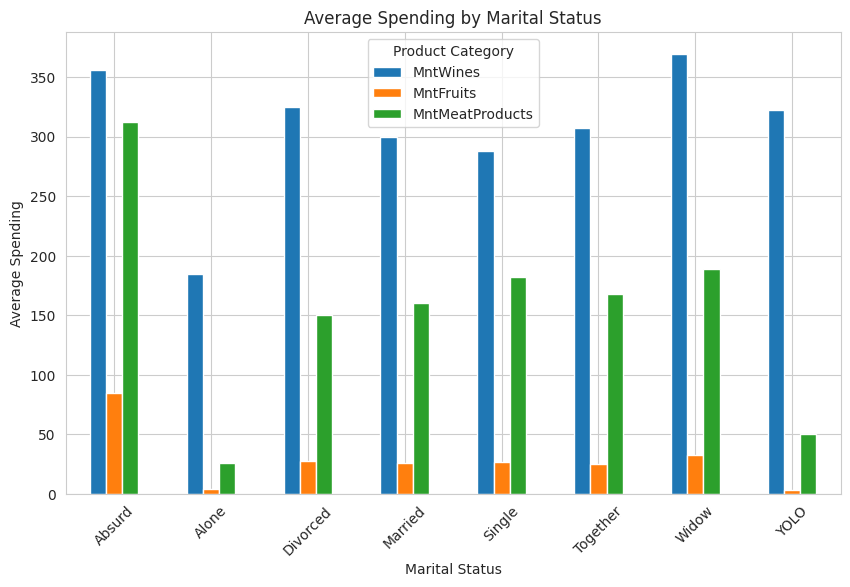

In [8]:
# Correlation matrix heatmap
numerical_cols_for_corr = ['Income', 'Recency', 'CustomerAge', 'TotalSpend', 
                          'NumWebVisitsMonth', 'NumDealsPurchases', 
                          'NumCatalogPurchases', 'NumStorePurchases']
corr_matrix = df[numerical_cols_for_corr].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Regression plot: Total Spend vs Customer Age
plt.figure(figsize=(10, 6))
sns.regplot(x='CustomerAge', y='TotalSpend', data=df, scatter_kws={'alpha':0.3})
plt.title('Total Spend Amount vs Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Total Spend Amount')
plt.show()

# Marital Status vs Spending patterns
marital_spending = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts']].mean()

plt.figure(figsize=(15, 6))
marital_spending.plot(kind='bar')
plt.title('Average Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

In [9]:
# Select features for modeling
# Categorical: Education, Marital_Status
# Numerical: Income, Recency, CustomerAge, NumWebVisitsMonth, NumDealsPurchases
features = ['Education', 'Marital_Status', 'Income', 'Recency', 
            'CustomerAge', 'NumWebVisitsMonth', 'NumDealsPurchases']
X = df[features]
y_reg = df['TotalSpend']  # For regression
y_clf = df['CustomerValueTier']  # For classification

# Preprocessing pipeline
categorical_features = ['Education', 'Marital_Status']
numerical_features = ['Income', 'Recency', 'CustomerAge', 'NumWebVisitsMonth', 'NumDealsPurchases']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1792, 7)
Test set shape: (448, 7)


Regression Model Performance:
RMSE: 341.11
R2 Score: 0.67


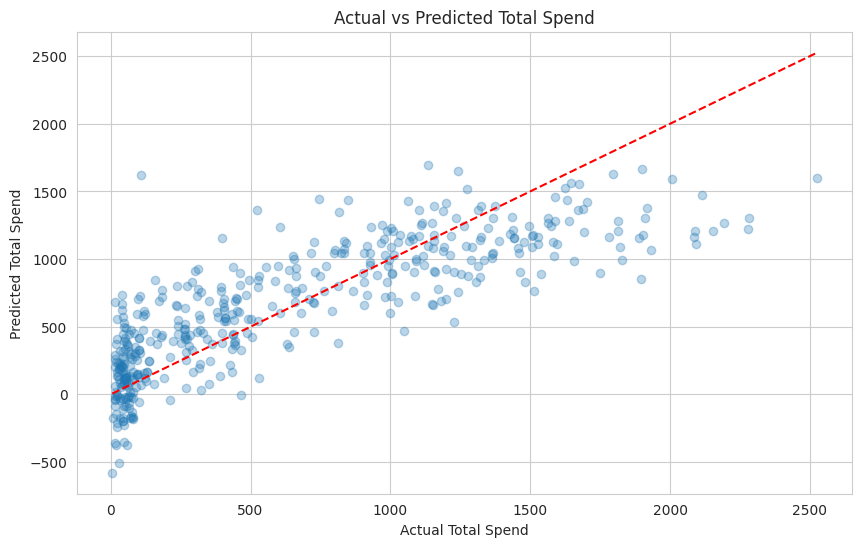

In [10]:
# Regression pipeline
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
reg_pipeline.fit(X_train, y_reg_train)

# Predictions
y_reg_pred = reg_pipeline.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)

print("Regression Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.3)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel('Actual Total Spend')
plt.ylabel('Predicted Total Spend')
plt.title('Actual vs Predicted Total Spend')
plt.show()

Best parameters found:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

      Bronze       0.78      0.92      0.84       156
        Gold       0.38      0.29      0.33        73
     Premium       0.72      0.87      0.79       134
      Silver       0.60      0.33      0.42        85

    accuracy                           0.69       448
   macro avg       0.62      0.60      0.60       448
weighted avg       0.66      0.69      0.66       448


Confusion Matrix:
[[143   5   4   4]
 [  2  21  36  14]
 [  3  13 117   1]
 [ 36  16   5  28]]


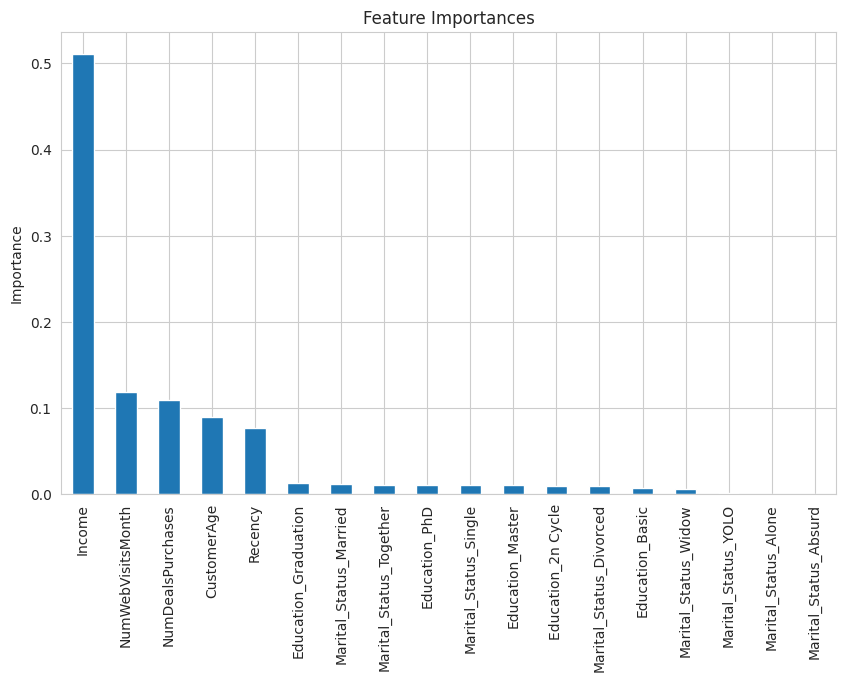

In [11]:
# Classification pipeline
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_clf_train)

# Best parameters
print("Best parameters found:")
print(grid_search.best_params_)

# Best model
best_clf = grid_search.best_estimator_

# Predictions
y_clf_pred = best_clf.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_clf_test, y_clf_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_clf_test, y_clf_pred))

# Feature importance
feature_names = (numerical_features + 
                 list(best_clf.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features)))

importances = best_clf.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

In [12]:
# Package the best model (classification)
with open('customer_value_model.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

# Load the model
with open('customer_value_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Sample prediction
sample_data = pd.DataFrame({
    'CustomerAge': [50],
    'Income': [60000],
    'Recency': [30],
    'NumWebVisitsMonth': [5],
    'NumDealsPurchases': [2],
    'Education': ['Graduation'],
    'Marital_Status': ['Married']
})

prediction = loaded_model.predict(sample_data)
print(f"\nPredicted Customer Value Tier: {prediction[0]}")

# Deployment explanation
print("""
Model Deployment Approach:
1. Package the trained model with its preprocessing pipeline using pickle
2. Deploy as a microservice using Flask/FastAPI
3. Create API endpoints that accept customer data and return predictions
4. Integrate with marketing systems to trigger targeted campaigns
5. Monitor model performance over time and retrain periodically
""")


Predicted Customer Value Tier: Gold

Model Deployment Approach:
1. Package the trained model with its preprocessing pipeline using pickle
2. Deploy as a microservice using Flask/FastAPI
3. Create API endpoints that accept customer data and return predictions
4. Integrate with marketing systems to trigger targeted campaigns
5. Monitor model performance over time and retrain periodically

